# Sprint 4 - Tasca 1

### Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

Primer de tot importarem la base de dades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#esta última permite incrustar gráficos en jupyter notebooks.

In [2]:
ruta_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 4 T1 - preu lloguer pisos\\preu lloguer per trimestre i barri.csv"

In [3]:
df = pd.read_csv(ruta_archivo, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 2021 to 2021
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Trimestre       584 non-null    int64 
 1   Codi_Districte  584 non-null    int64 
 2   Nom_Districte   584 non-null    object
 3   Codi_Barri      584 non-null    int64 
 4   Nom_Barri       584 non-null    object
 5   Lloguer_mitja   584 non-null    object
 6   Preu            584 non-null    object
dtypes: int64(3), object(4)
memory usage: 36.5+ KB


Observant les dades, veiem que les columnes Lloguer_mitja i Preu s'haurien de dividir en dos columnes. És a dir, hi hauria d'haver una columna del lloguer mitjà mensual i una altra que fos el preu per metre quadrat. També observem que la columna Preu no hauria de ser un objecte, sinó un número amb decimals (un float). Si no, no es podràn fer operacions matemàtiques en cas de necessitat. S'ha intentat fer, però resulta que la columna Preu conté valors "--" i no es poden convertir en float. Abans de convertir la columna Preu en float hem de fer aquest canvi.

In [4]:
df["Preu"] = df["Preu"].replace("--", float("nan"))
df["Preu"] = df["Preu"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 2021 to 2021
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Trimestre       584 non-null    int64  
 1   Codi_Districte  584 non-null    int64  
 2   Nom_Districte   584 non-null    object 
 3   Codi_Barri      584 non-null    int64  
 4   Nom_Barri       584 non-null    object 
 5   Lloguer_mitja   584 non-null    object 
 6   Preu            540 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 36.5+ KB


Observem que hi ha 44 valors Nan.  El primer que farem serà crear un filtre per poder veure quins són.

In [5]:
df_null = df[df["Preu"].isnull()]
df_null



,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
Any,,,,,,,
2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN


La millor manera de subsitutir els valors nulls serà introduïnt la mitja del seu districte. En general és una bona solució. EL problema de la mitja és amb Nou Barris que de 13 barris 3 s'han de substituir per la mitja.
De moment no durem a terme aquesta substitució, ja que primer cal separar el dataset en dos. Ja que sinó les mitjes es veurien afectades.

Dividirem el Df en dos subdatasets. Per tal de poder fer després un merge tenint en compte les diferents columnes que tenen en comú

In [6]:
df_preu_mes=df[(df["Lloguer_mitja"]=="Lloguer mitjà mensual (Euros/mes)")]
df_preu_mes_copy = df_preu_mes.copy() #he hagut de crear una copia, per poder renombrar la columna
df_preu_mes_copy.rename(columns={"Preu" :"Preu mensual"}, inplace=True)



Ara és el moment de substituir els valors buits de la columna Preu mensual per la mitja agrupada per districte. 

In [7]:
df_preu_mes_copy["Preu mensual"] = df_preu_mes_copy.groupby('Nom_Districte')["Preu mensual"].transform(lambda x: x.fillna(x.mean()))
df_preu_mes_copy
df_preu_mes_copy[df_preu_mes_copy["Preu mensual"].isnull()]


,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu mensual
Any,,,,,,,


In [8]:
df_preu_mes.groupby('Nom_Districte')["Preu"].mean()

Nom_Districte
Ciutat Vella            858.925000
Eixample               1000.545833
Gràcia                  877.265000
Horta-Guinardó          765.007500
Les Corts              1214.066667
Nou Barris              664.292500
Sant Andreu             721.196154
Sant Martí              916.450000
Sants-Montjuïc          798.932143
Sarrià-Sant Gervasi    1271.212500
Name: Preu, dtype: float64

In [9]:
df_preu_mes_copy.groupby('Nom_Districte')["Preu mensual"].mean()

Nom_Districte
Ciutat Vella            858.925000
Eixample               1000.545833
Gràcia                  877.265000
Horta-Guinardó          765.007500
Les Corts              1214.066667
Nou Barris              664.292500
Sant Andreu             721.196154
Sant Martí              916.450000
Sants-Montjuïc          798.932143
Sarrià-Sant Gervasi    1271.212500
Name: Preu mensual, dtype: float64

Podem observar que no hi ha valors nulls. La substitució s'ha realitzat amb èxit.

In [10]:
df_preu_m2=df[(df["Lloguer_mitja"]=="Lloguer mitjà per superfície (Euros/m2 mes)")]
df_preu_m2_copy = df_preu_m2.copy() #he hagut de crear una copia, per poder renombrar la columna
df_preu_m2_copy.rename(columns={"Preu" :"Preu m2"}, inplace=True)
df_preu_m2_copy["Preu m2"] = df_preu_m2_copy.groupby('Nom_Districte')["Preu m2"].transform(lambda x: x.fillna(x.mean()))
df_preu_m2_copy

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu m2
Any,,,,,,,
2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...
2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8


Un cop tenim creats els dos subsets df_preu_mes_copy i el df_preu_m2_copy els unirem amb **merge**.

In [11]:
df_fusio = pd.merge(df_preu_mes_copy, df_preu_m2_copy, on=["Any", "Trimestre", "Codi_Districte","Nom_Districte", "Codi_Barri","Nom_Barri"], how='inner')
df_fusio

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja_x,Preu mensual,Lloguer_mitja_y,Preu m2
Any,,,,,,,,,
2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,Lloguer mitjà per superfície (Euros/m2 mes),12.8
2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,Lloguer mitjà per superfície (Euros/m2 mes),12.3
2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,Lloguer mitjà per superfície (Euros/m2 mes),15.5
2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4,Lloguer mitjà per superfície (Euros/m2 mes),13.3
2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...,...
2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3,Lloguer mitjà per superfície (Euros/m2 mes),15.2
2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5,Lloguer mitjà per superfície (Euros/m2 mes),10.8
2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8,Lloguer mitjà per superfície (Euros/m2 mes),13.8


Una manera més sencilla d'haver fet aquest procès haguès estat amb la següent refactorització:

In [12]:
#import pandas as pd

# Filtrar los datos para obtener los DataFrames df_preu_mes y df_preu_m2
#df_preu_mes = df.loc[df["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]
#df_preu_m2 = df.loc[df["Lloguer_mitja"] == "Lloguer mitjà per superfície (Euros/m2 mes)"]

# Renombrar la columna "Preu" en ambos DataFrames
#df_preu_mes.rename(columns={"Preu": "Preu mensual"}, inplace=True)
#df_preu_m2.rename(columns={"Preu": "Preu m2"}, inplace=True)

# Fusionar los DataFrames utilizando pd.merge()
#df_fusio = pd.merge(df_preu_mes, df_preu_m2, on=["Any", "Trimestre", "Codi_Districte", "Nom_Districte", "Codi_Barri", "Nom_Barri"], how='inner')

# Mostrar el DataFrame resultante
#print(df_fusio)



Ara ja podem eliminar les columnes Lloguer_mitja_x i Lloguer_mitja_y.

In [13]:
df_fusio = df_fusio.drop(["Lloguer_mitja_x","Lloguer_mitja_y"],axis=1)
df_final = df_fusio.copy()
df_final

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu mensual,Preu m2
Any,,,,,,,
2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...
2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8


Ara ja tenim les dades ben estructurades i podem començar a netejarles: buscar duplicats, valors buits, Nans, ...

In [14]:
df_final.info()
df_final.drop_duplicates()
df_final.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 2021 to 2021
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Trimestre       292 non-null    int64  
 1   Codi_Districte  292 non-null    int64  
 2   Nom_Districte   292 non-null    object 
 3   Codi_Barri      292 non-null    int64  
 4   Nom_Barri       292 non-null    object 
 5   Preu mensual    292 non-null    float64
 6   Preu m2         292 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 18.2+ KB


Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Preu mensual      0
Preu m2           0
dtype: int64

Hem vist que les dades estan netes. No hi ha valors duplicats, ni valors Nan ni espais buits. De manera que ja podem començar a treballar amb les dades.


**Crea almenys una visualització per:**

- Una variable categòrica (Districte o Barri)

Observant les dades veiem que no tenim cap columna considerada com a Catergòrica, sinó com a objecte. Cambiarém el tipus de les següents columnes: Codi_Districte	Nom_Districte	Codi_Barri	Nom_Barri


In [15]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Trimestre,292.0,2.500000,1.119953,1.0,1.75,2.500000,3.250,4.0
Codi_Districte,292.0,6.246575,2.793123,1.0,4.00,7.000000,8.000,10.0
Codi_Barri,292.0,37.000000,21.107481,1.0,19.00,37.000000,55.000,73.0
Preu mensual,292.0,859.588907,217.345484,447.5,735.80,804.950000,927.750,1816.5
Preu m2,292.0,12.625486,1.680683,6.7,11.50,12.689286,13.525,18.0


In [16]:
df_final.groupby("Nom_Districte")[["Preu mensual","Preu m2"]].describe().T

Nom_Districte       Ciutat Vella     Eixample      Gràcia  Horta-Guinardó  \
Preu mensual count     16.000000    24.000000   20.000000       44.000000   
             mean     858.925000  1000.545833  877.265000      765.007500   
             std       70.783468   105.239524   65.810072       58.610521   
             min      759.200000   887.100000  745.400000      653.500000   
             25%      800.225000   922.800000  859.175000      733.650000   
             50%      870.000000   964.950000  895.650000      762.703750   
             75%      924.500000  1070.800000  921.800000      817.400000   
             max      968.400000  1220.800000  961.000000      884.200000   
Preu m2      count     16.000000    24.000000   20.000000       44.000000   
             mean      13.775000    13.300000   13.380000       11.987500   
             std        1.417274     0.353861    0.661418        0.771946   
             min       12.300000    12.500000   12.100000        9.500000   
             25%       12.875000    13.000000   12.800000       11.775000   
             50%       13.200000    13.300000   13.600000       12.000000   
             75%       14.375000    13.600000   13.900000       12.450000   
             max       16.400000    14.000000   14.300000       13.400000   

Nom_Districte         Les Corts  Nou Barris  Sant Andreu   Sant Martí  \
Preu mensual count    12.000000   52.000000    28.000000    40.000000   
             mean   1214.066667  664.292500   721.196154   916.450000   
             std     359.670946   62.188437    90.795246   178.808413   
             min     904.800000  488.100000   447.500000   700.500000   
             25%     969.000000  646.675000   655.200000   795.350000   
             50%    1007.900000  664.292500   752.950000   869.200000   
             75%    1618.475000  691.675000   791.700000   976.975000   
             max    1816.500000  803.700000   827.200000  1364.700000   
Preu m2      count    12.000000   52.000000    28.000000    40.000000   
             mean     14.008333   10.922500    11.153846    13.440000   
             std       0.994949    1.015080     1.170068     1.855664   
             min      12.500000    8.100000     6.700000    10.800000   
             25%      13.250000   10.916875    10.850000    11.675000   
             50%      13.900000   11.050000    11.500000    13.150000   
             75%      14.425000   11.600000    11.825000    14.675000   
             max      15.800000   12.700000    12.500000    17.300000   

Nom_Districte       Sants-Montjuïc  Sarrià-Sant Gervasi  
Preu mensual count       32.000000            24.000000  
             mean       798.932143          1271.212500  
             std         36.353081           190.916844  
             min        691.900000           990.100000  
             25%        780.800000          1138.375000  
             50%        799.750000          1278.850000  
             75%        815.400000          1371.625000  
             max        872.500000          1597.400000  
Preu m2      count       32.000000            24.000000  
             mean        12.678571            15.012500  
             std          0.886951             1.265362  
             min         10.200000            11.400000  
             25%         12.633929            14.450000  
             50%         12.900000            15.100000  
             75%         13.200000            15.750000  
             max         13.800000            18.000000

In [17]:
cols_to_convert = ["Codi_Districte","Nom_Districte", "Codi_Barri", "Nom_Barri"]
df_final[cols_to_convert] = df_final[cols_to_convert].astype('category')

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 2021 to 2021
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Trimestre       292 non-null    int64   
 1   Codi_Districte  292 non-null    category
 2   Nom_Districte   292 non-null    category
 3   Codi_Barri      292 non-null    category
 4   Nom_Barri       292 non-null    category
 5   Preu mensual    292 non-null    float64 
 6   Preu m2         292 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 16.3 KB


In [19]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Trimestre,292.0,2.500000,1.119953,1.0,1.75,2.500000,3.250,4.0
Preu mensual,292.0,859.588907,217.345484,447.5,735.80,804.950000,927.750,1816.5
Preu m2,292.0,12.625486,1.680683,6.7,11.50,12.689286,13.525,18.0


In [20]:
df_dist = df_final.groupby(by="Nom_Districte")["Nom_Barri"].nunique()
df_dist

Nom_Districte
Ciutat Vella            4
Eixample                6
Gràcia                  5
Horta-Guinardó         11
Les Corts               3
Nou Barris             13
Sant Andreu             7
Sant Martí             10
Sants-Montjuïc          8
Sarrià-Sant Gervasi     6
Name: Nom_Barri, dtype: int64

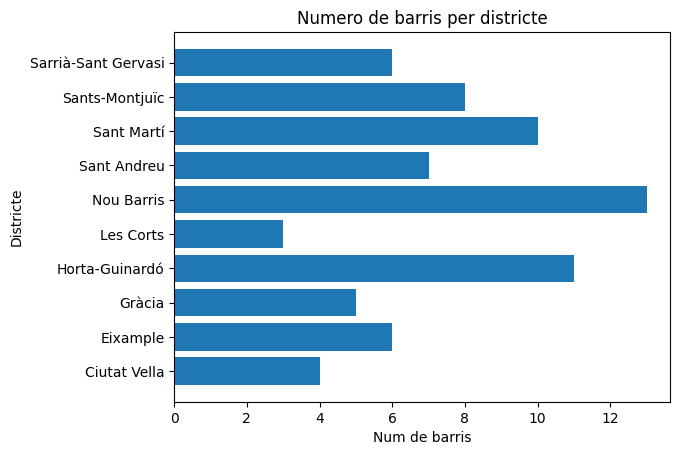

In [41]:
plt.barh(df_dist.index, df_dist.values)

plt.xlabel("Num de barris")
plt.ylabel("Districte")
plt.title("Numero de barris per districte")

plt.savefig("Barris_Barcelona_per_Districte.png")
plt.show()



- Una variable numèrica (Preu)

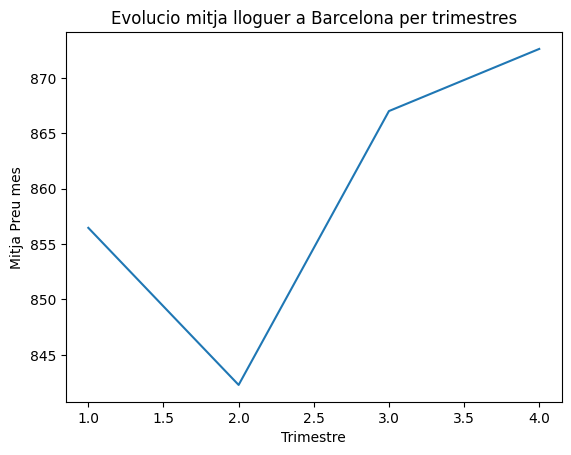

In [42]:
df_evol_trim = df_final.groupby(by="Trimestre")["Preu mensual"].mean().round(2)

plt.plot(df_evol_trim.index, df_evol_trim.values)

plt.xlabel("Trimestre")
plt.ylabel("Mitja Preu mes")
plt.title("Evolucio mitja lloguer a Barcelona per trimestres")

plt.savefig("Evolucio_lloguer_Barcelona.png")
plt.show()


Podem observar que la evolució de la mitja dels lloguers a Barcelona està augmentant de manera considerable. Tot i que al 2 Trimestre hi va haver una baixada, al 3 Trimestre es va recuperar la baixada i fins i tot va augmentar de manera considerable.


- Una variable numèrica i una categòrica (Districte i Preu)

Farem un gràfic amb la mitjana del lloguer per mes per districte.


In [23]:
df_dist_preu_mes = df_final.groupby(by="Nom_Districte")["Preu mensual"].mean().round(2)
df_dist_preu_mes

Nom_Districte
Ciutat Vella            858.92
Eixample               1000.55
Gràcia                  877.26
Horta-Guinardó          765.01
Les Corts              1214.07
Nou Barris              664.29
Sant Andreu             721.20
Sant Martí              916.45
Sants-Montjuïc          798.93
Sarrià-Sant Gervasi    1271.21
Name: Preu mensual, dtype: float64

In [24]:
df_dist_preu_m2 = df_final.groupby(by="Nom_Districte")["Preu m2"].mean().round(2)
df_dist_preu_m2

Nom_Districte
Ciutat Vella           13.78
Eixample               13.30
Gràcia                 13.38
Horta-Guinardó         11.99
Les Corts              14.01
Nou Barris             10.92
Sant Andreu            11.15
Sant Martí             13.44
Sants-Montjuïc         12.68
Sarrià-Sant Gervasi    15.01
Name: Preu m2, dtype: float64

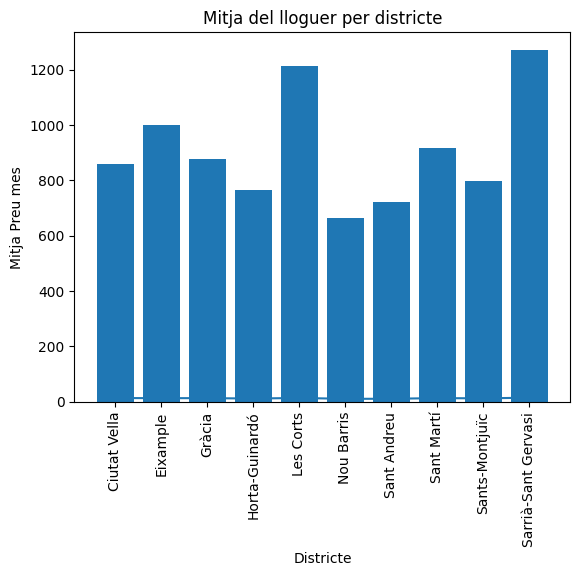

In [43]:
plt.bar(df_dist_preu_mes.index, df_dist_preu_mes.values)

plt.xticks(rotation='vertical')
plt.xlabel("Districte")
plt.ylabel("Mitja Preu mes")
plt.title("Mitja del lloguer per districte")

plt.plot(df_dist_preu_m2.index, df_dist_preu_m2.values)

plt.savefig("Mitja_lliguer_districte.png")
plt.show()



- Dues variables numèriques (Any o Trimestre i Preu)


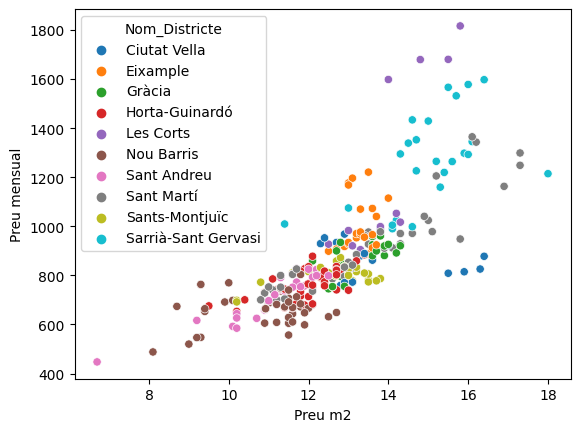

In [44]:
sns.scatterplot (data=df_final, x="Preu m2", y="Preu mensual" , hue= "Nom_Districte")
plt.savefig("Relacio_entre_m2_i_preu_mensual.png")

Amb aquesta gràfica podem observar que estan relacionats el preu per metre quadrat i el preu mensual del lloguer. També podem veure com estan repartits els diferents districtes. En general, els preus de cada districte estan bastant concentrats a excepció de Les Corts, Sarrià-Sant Gervasi i alguns barris de Sant Martí. 

Per tal de poder mirar-ho més detingudament, farem la mateixa gràfica per cada districte.

C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gemma\AppData\Local\Temp\ipykernel_6068\1026319608.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


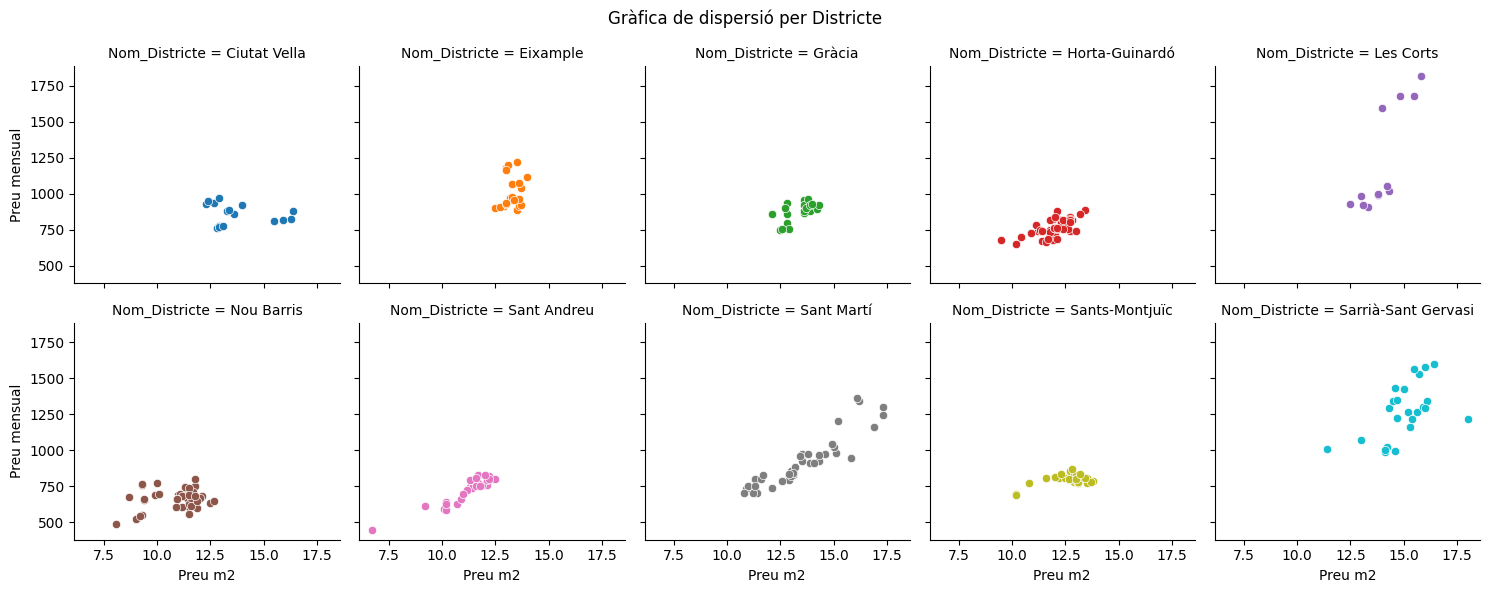

In [45]:
# Creem la forma que tindrà aquesta visualització. Demanem 5 columnes
g = sns.FacetGrid(df_final,col="Nom_Districte", hue= "Nom_Districte", col_wrap=5)

# Definim  el scatter plot dins del FacetGrid
g.map(sns.scatterplot, "Preu m2", "Preu mensual")


g.set_axis_labels("Preu m2", "Preu mensual")
g.fig.suptitle("Gràfica de dispersió per Districte")

plt.tight_layout()

plt.savefig("Rel_pm2_i_preu_mensual_districte.png")
plt.show()



- Tres variables (Barri o Districte, Trimestre i Preu)

Per tal d'observar les evolucions al llarg de l'any del preu del lloguer per Districe farem una gràfica general de la mitja, el valor mínim i el valor màxim.

In [28]:
# en matplotlib
#df_evol_trim = df_final.groupby(by="Trimestre")["Preu mensual"].mean().round(2)
#df_evol_trim_min = df_final.groupby(by="Trimestre")["Preu mensual"].min().round(2)
#df_evol_trim_max = df_final.groupby(by="Trimestre")["Preu mensual"].max().round(2)

#plt.plot(df_evol_trim.index, df_evol_trim.values, label="Mitja")
#plt.plot(df_evol_trim_min.index, df_evol_trim_min.values, label="Minim")
#plt.plot(df_evol_trim_max.index, df_evol_trim_max.values, label="Màxim")

#plt.xlabel("Trimestre")
#plt.ylabel("Preu mes")
#plt.title("Evolucio mitja lloguer a Barcelona per trimestres")
#plt.legend()

#plt.show()

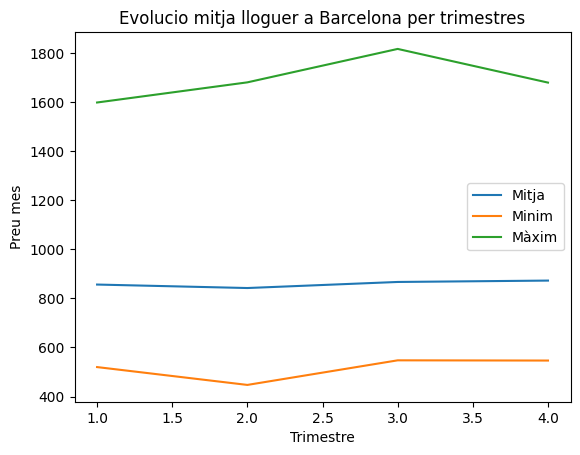

In [46]:
# en SEABORN
df_evol_trim = df_final.groupby(by="Trimestre")["Preu mensual"].mean().round(2)
df_evol_trim_min = df_final.groupby(by="Trimestre")["Preu mensual"].min().round(2)
df_evol_trim_max = df_final.groupby(by="Trimestre")["Preu mensual"].max().round(2)

sns.lineplot(data=df_evol_trim, x=df_evol_trim.index, y=df_evol_trim.values, label="Mitja")
sns.lineplot(data=df_evol_trim_min, x=df_evol_trim_min.index, y=df_evol_trim_min.values, label="Minim")
sns.lineplot(data=df_evol_trim_max, x=df_evol_trim_max.index, y=df_evol_trim_max.values, label="Màxim")

plt.xlabel("Trimestre")
plt.ylabel("Preu mes")
plt.title("Evolucio mitja lloguer a Barcelona per trimestres")

plt.legend()

plt.savefig("Mitja_minim_maxim_per_trimestre_Barcelona.png")
plt.show()



### Exercici 2
Exporta els gràfics com imatges o com HTML.

S'ha fet directament després de cada gràfica. Les instruccions per a exportar una imatge com a png és:

***plt.savefig("Mitja_minim_maxim_per_trimestre_Barcelona.png")***

És important posar aquest instrucció abans de plt.show(). Si no només crearà la imatge en blanc.

### Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.

Per tal de veure més detingudament la evolució dels preus per districte i la diferència entre mínimes i màximes faré un unes gràfiques per districte.



In [30]:
df_evol_trim_dist = df_final.groupby(by=["Nom_Districte", "Trimestre"])["Preu mensual"].mean().round(2)
df_evol_trim_min_dist = df_final.groupby(by=["Nom_Districte", "Trimestre"])["Preu mensual"].min().round(2)
df_evol_trim_max_dist = df_final.groupby(by=["Nom_Districte", "Trimestre"])["Preu mensual"].max().round(2)


Quan es fan agrupacions per groupby és necessario fer un **.reset_index()** per a que es converteixi en un data frame i no hi hagi problemes amb les columnes i els indexs.

In [31]:
df_dist_mean = df_evol_trim_dist.reset_index()
df_dist_min= df_evol_trim_min_dist.reset_index()
df_dist_max = df_evol_trim_max_dist.reset_index()


Unirem aquests tres dataframes en un únic, de manera que abans hem de cambiar el nom de ples columnes Preu Mensual de cadascun.

In [32]:
df_dist_mean.rename(columns={"Preu mensual": "Preu mitg"}, inplace=True)
df_dist_min.rename(columns={"Preu mensual": "Preu minim"}, inplace=True)
df_dist_max.rename(columns={"Preu mensual": "Preu maxim"}, inplace=True)



Ara fusionarem els 3 datasets en un únic. Per tal de poder tenir les estadístiques més agrupades.

In [33]:
# NO es poden fer merges de més de dos dataframes a l'hora. Per això farem primer 1 i després l'altre.
df_dist_final = pd.merge(df_dist_mean, df_dist_min, on=["Nom_Districte", "Trimestre"], suffixes=("_mean", "_min"))
df_dist_final = pd.merge(df_dist_final, df_dist_max, on=["Nom_Districte", "Trimestre"], suffixes=("", "_max"))



C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


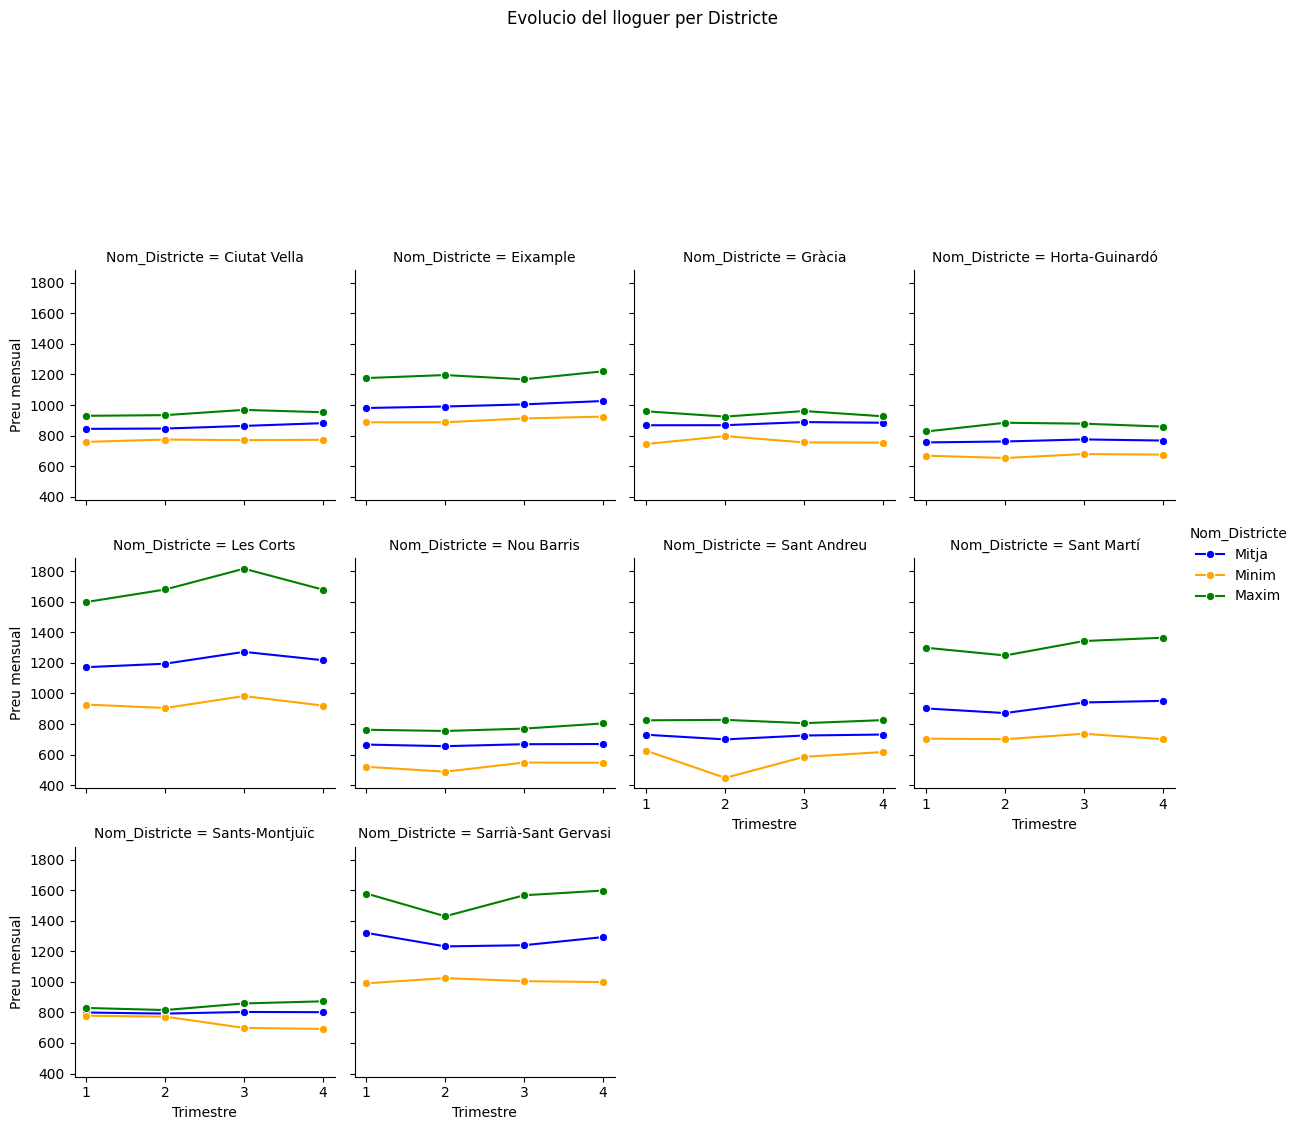

In [49]:
f = sns.FacetGrid(df_dist_final, col="Nom_Districte", hue="Nom_Districte", col_wrap=4)


f.map(sns.lineplot, "Trimestre", "Preu mitg", marker="o", label="Mitja", color="blue")
f.map(sns.lineplot, "Trimestre", "Preu minim", marker="o", label="Minim", color="orange")
f.map(sns.lineplot, "Trimestre", "Preu maxim", marker="o", label="Mitja" , color = "green")


f.set_axis_labels("Trimestre", "Preu mensual")
f.fig.suptitle("Evolucio del lloguer per Districte", y=1.25)


etiquetas = {"Preu mitg": "Mitja", "Preu minim": "Minim", "Preu maxim": "Maxim"}
f.add_legend(labels=etiquetas.values())


plt.savefig("Evolucio_mitja_minim_maxim_per_Districte.png")
plt.show()



Amb aquestes gràfiques podem observar que hi ha molts districtes amb poca diferencia de preus entre els seus barris. Els mínims i màxims són bastant similars. Els principals Districtes amb aquestes característiques són:  Ciutat Vella, Gràcia, Horta-Guinardó, Sants, Sant-Andreu. Altres com les Corts, Sant Marti i Sarrià tenen barris amb diferencies de preus significatives entre les màximes i les mínimes.